<a href="https://colab.research.google.com/github/SanjeevReddy61/Projects/blob/main/MicroSoft_StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM Time Series Forecasting with TensorFlow & Python Using MicrosoftStocks Dataset**:


In [103]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sa
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [107]:
#Read data
data=pd.read_csv('/content/MicrosoftStock (1).csv')
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,08-02-2013,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,11-02-2013,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,12-02-2013,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,13-02-2013,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,14-02-2013,27.92,28.06,27.87,28.04,32663174,MSFT


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


Text(0.5, 1.0, 'Open-close Price over time')

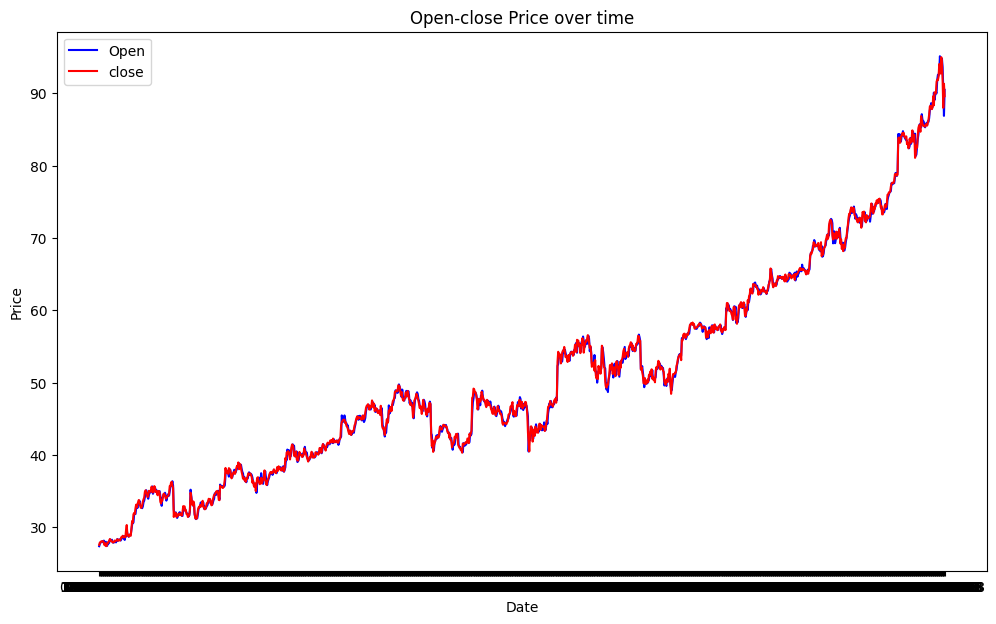

In [106]:
#data visuilization-Open and close time over time
plt.figure(figsize=(12,7))
plt.plot(data['date'],data['open'],label="Open",color="blue")
plt.plot(data['date'],data['close'],label="close",color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Open-close Price over time")

Text(0.5, 1.0, 'Features correlation')

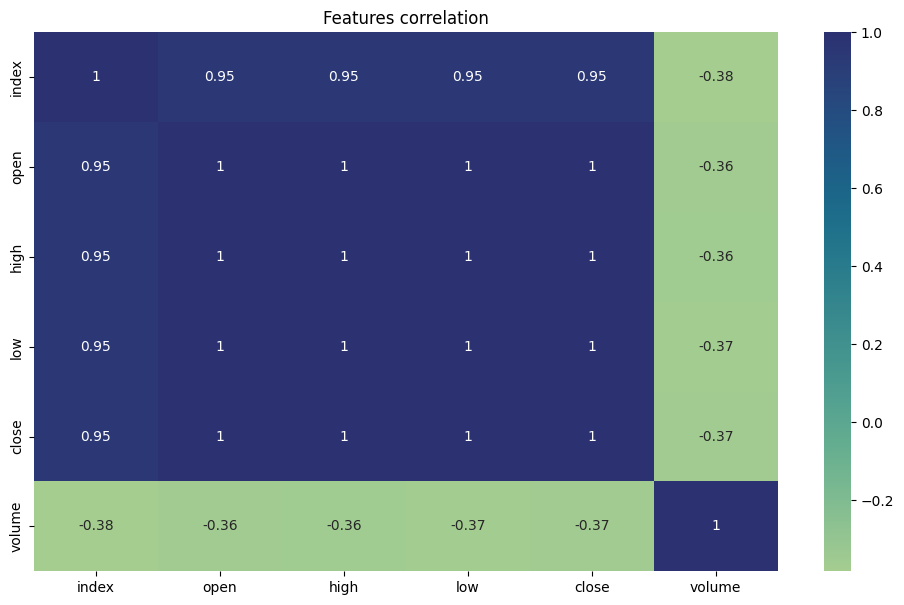

In [10]:
#visualizing the correlation
numeric_data=data.select_dtypes(["int64","float64"])
plt.figure(figsize=(12,7))
sa.heatmap(numeric_data.corr(),annot=True,cmap="crest")
plt.title("Features correlation")

**We can say volume is less correlated**

In [99]:
#conver the date into datetime,because the pandas treats the date as a string
from datetime import datetime
data["date"] = pd.to_datetime(data["date"], format="%d-%m-%Y") # Specify the correct date format
prediction = data.loc[
    (data["date"] > datetime(2013,1,1)) &
    (data["date"] < datetime(2018,1,1))
]


**This is a univariate time series model:**
* 1 input feature (Close) → 1 output value (next Close).


In [108]:
#considering the "close" column to analyis the trend
stock_close=data["close"]
dataset=stock_close.values #convert to numpy array
dataset

array([27.55, 27.86, 27.88, ..., 88.  , 91.33, 89.61])

In [19]:
len(dataset)

1259

In [100]:
#taking 95% of dataset to train
training_data_len=int(np.ceil(len(dataset)*0.95))

scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset.reshape(-1,1))

training_data=scaled_data[:training_data_len] #95% of all data

In [101]:
#LSTM needs 60 previous time steps to predict 1 future step
x_train,y_train=[],[]
for i in range(60, len(training_data)):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))#reshaping to 3D

In [109]:
x_train.shape,y_train.shape

((1137, 60, 1), (1137,))

In [95]:
#create model
model=keras.models.Sequential()
model.add(keras.layers.LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))


#Compile model
model.compile(optimizer="adam",loss="mae",metrics=[keras.metrics.RootMeanSquaredError()])

#Fit the model
model.fit(x_train,y_train,epochs=30,batch_size=32)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - loss: 0.3499 - root_mean_squared_error: 0.4893
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.1044 - root_mean_squared_error: 0.1397
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0982 - root_mean_squared_error: 0.1299
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 0.0974 - root_mean_squared_error: 0.1324
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0916 - root_mean_squared_error: 0.1219
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0849 - root_mean_squared_error: 0.1148
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - loss: 0.0882 - root_mean_squared_error: 0.1217
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0819 - root_mean_squared_error: 0.1122
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0884 - root_mean_squared_error: 0.1211
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0856 - root_mean_squared_e

In [78]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 373,253 (1.42 MB)

 Trainable params: 124,417 (486.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 248,836 (972.02 KB)

In [91]:
#Preparing the test data
test_data=scaled_data[training_data_len-60:]
x_test,y_test=[],[dataset[training_data_len:]]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [110]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
#converting the prediction to original form

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


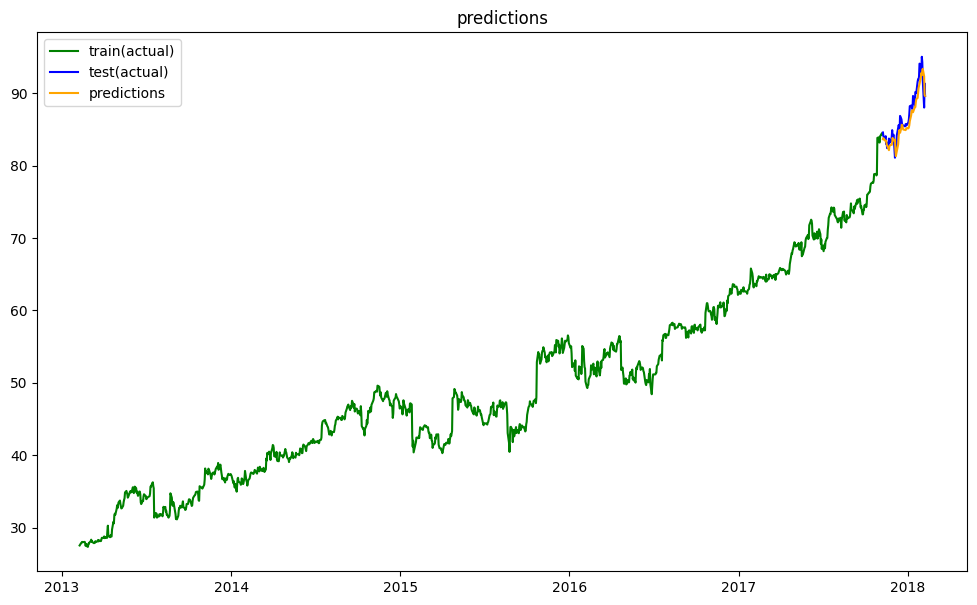

In [97]:
#ploting the Training data,Actual Testdata and predicted Testdata
train=data[:training_data_len]
test=data[training_data_len:]
test=test.copy()

test["predictions"]=predictions

plt.figure(figsize=(12,7))
plt.plot(train["date"],train["close"],label="train(actual)",color='green')
plt.plot(test["date"],test["close"],label="test(actual)",color='blue')
plt.plot(test["date"],test["predictions"],label="predictions",color="orange")
plt.title("predictions")
plt.legend()


In [111]:
from sklearn.metrics import mean_absolute_error
mae =mean_absolute_error(y_test[0], predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1.0926993929955264
